In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from anomaly_detection.core.features import build_features
from anomaly_detection.core.models import IsolationForestModel

In [2]:
df = pd.read_csv("../data/realKnownCause/machine_temperature_system_failure.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").set_index("timestamp")

series = df["value"]
series.head()

timestamp
2013-12-02 21:15:00    73.967322
2013-12-02 21:20:00    74.935882
2013-12-02 21:25:00    76.124162
2013-12-02 21:30:00    78.140707
2013-12-02 21:35:00    79.329836
Name: value, dtype: float64

In [15]:
feat_df = build_features(series, window=60)
feat_df.head()
print("Original series length:", len(series))
print("Feature dataframe length:", len(feat_df))


Original series length: 22683
Feature dataframe length: 22624


In [16]:
model = IsolationForestModel()
model.fit(feat_df)


In [17]:
anomaly_mask = model.detect_anomalies(feat_df)
print("Anomalies detected:", anomaly_mask.sum())


Anomalies detected: 4579


In [18]:
y_feat = series.values[-len(feat_df):]
x_feat = feat_df.index
print(len(y_feat), len(x_feat), len(anomaly_mask))
# all should be 22636

22624 22624 22624


In [19]:
x_anom = x_feat[anomaly_mask]
y_anom = y_feat[anomaly_mask]


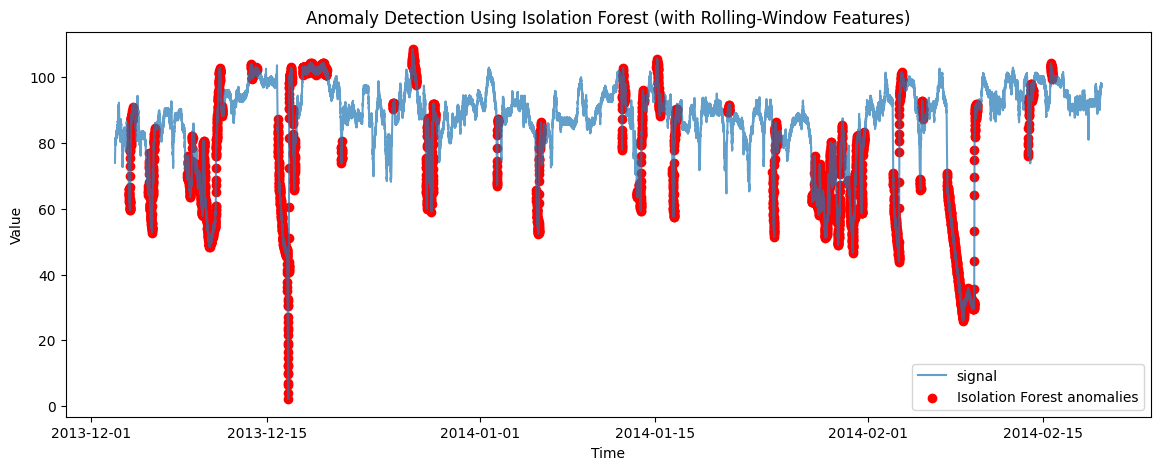

In [20]:
plt.figure(figsize=(14,5))

# plot the full time series
plt.plot(series.index, series.values, label="signal", alpha=0.7)

# highlight detected anomalies
plt.scatter(
    x_anom,
    y_anom,
    color="red",
    label="Isolation Forest anomalies"
)

plt.legend()
plt.title("Anomaly Detection Using Isolation Forest (with Rolling-Window Features)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
